In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('data/train.csv')
df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [5]:
df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'study_hours'}>,
        <Axes: title={'center': 'class_attendance'}>],
       [<Axes: title={'center': 'sleep_hours'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

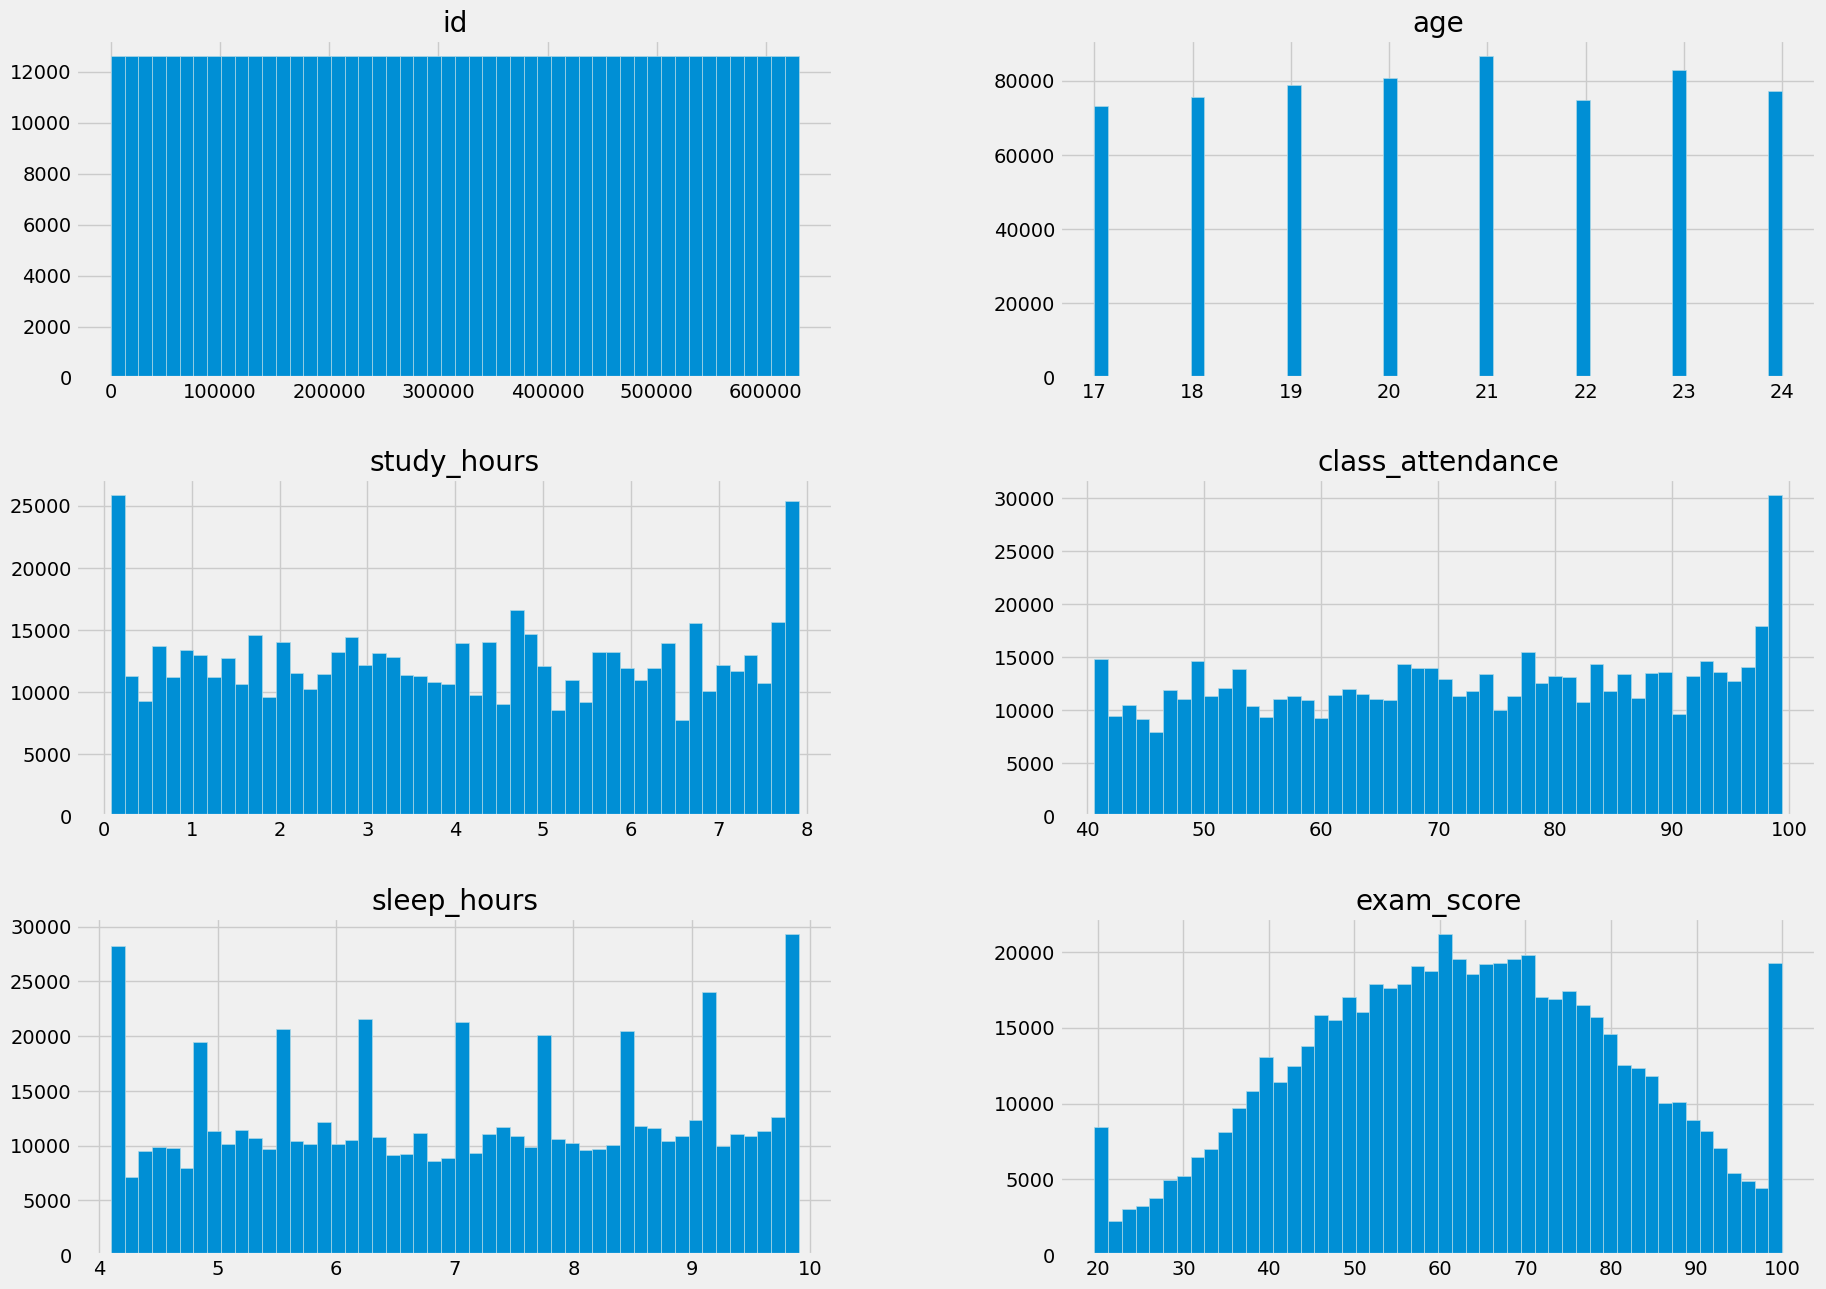

In [11]:
df.hist(bins=50, figsize=(20,15), edgecolor='lightblue')

In [20]:
numerical = df.columns[df.dtypes != 'object']
categorical = df.columns[df.dtypes == 'object']

target = 'exam_score'

numerical, categorical

(Index(['id', 'age', 'study_hours', 'class_attendance', 'sleep_hours',
        'exam_score'],
       dtype='object'),
 Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
        'facility_rating', 'exam_difficulty'],
       dtype='object'))

In [14]:
for col in categorical:
    print(f"{col} : {df[col].unique()}")

gender : ['female' 'other' 'male']
course : ['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']
internet_access : ['no' 'yes']
sleep_quality : ['average' 'poor' 'good']
study_method : ['online videos' 'self-study' 'coaching' 'group study' 'mixed']
facility_rating : ['low' 'medium' 'high']
exam_difficulty : ['easy' 'moderate' 'hard']


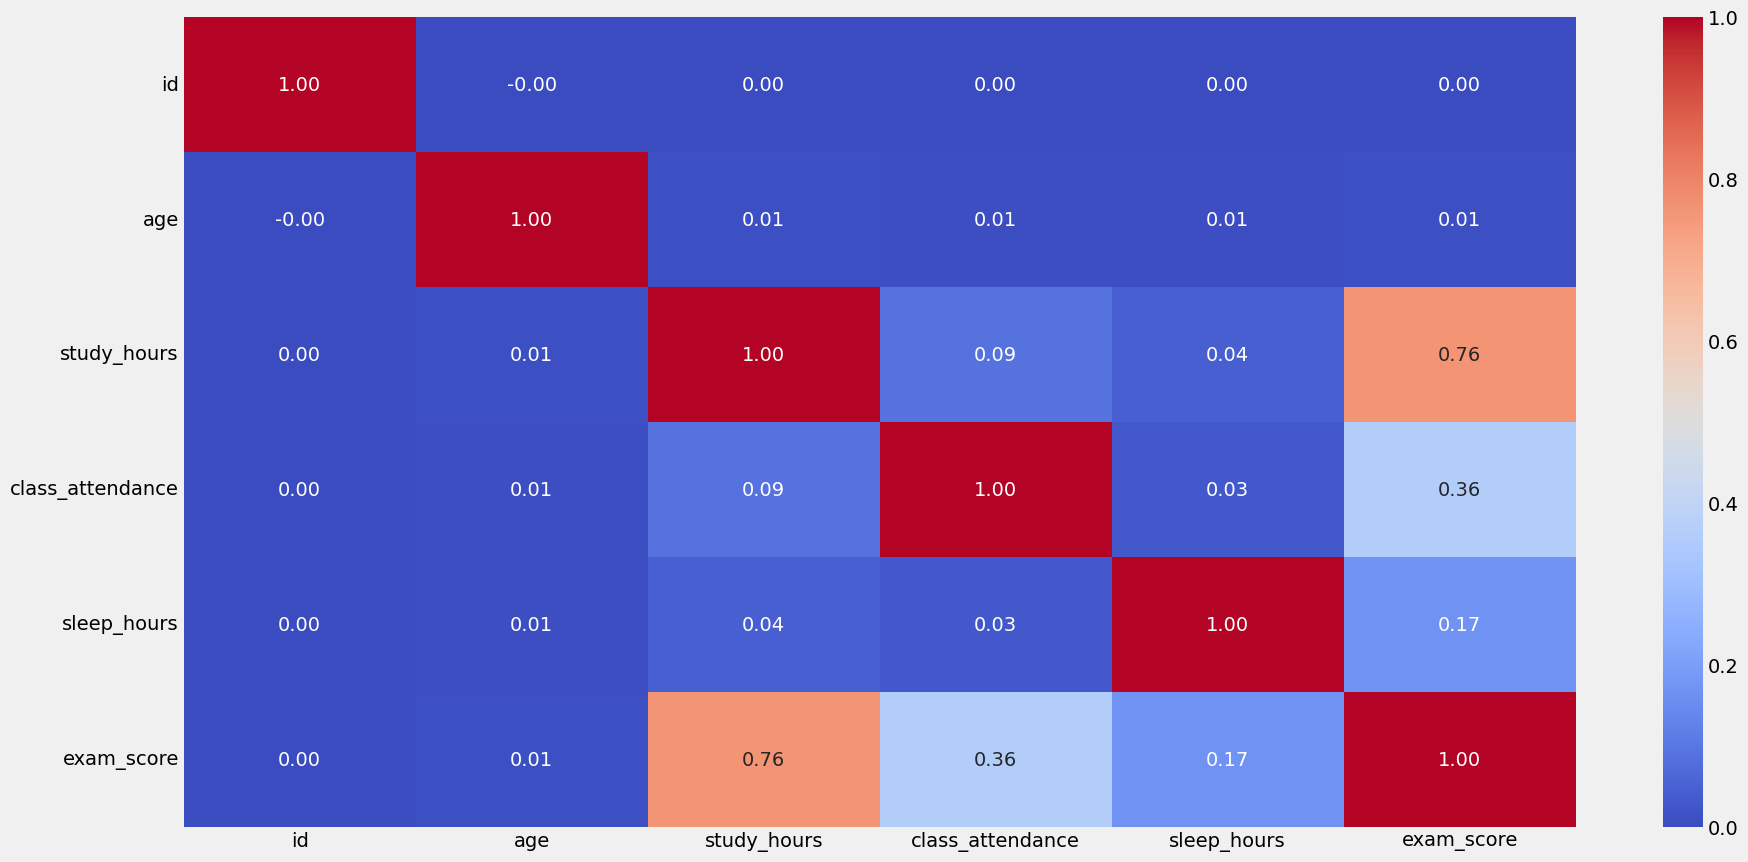

In [ ]:
plt.figure(figsize=(20,10))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()